# Sesión 6: Árboles de Decisión (CART), Poda, ROC y AUC

En esta sesión trabajaremos con árboles de decisión y técnicas de poda para evitar el sobreajuste. También aprenderemos a evaluar el desempeño del modelo mediante la curva ROC y el AUC.

### 📦 Importación de librerías
Importamos las librerías necesarias para la manipulación de datos, entrenamiento de modelos, visualización y evaluación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### 📘 Sobre el dataset `breast_cancer` de `sklearn`

El conjunto de datos `breast_cancer` está disponible directamente en la biblioteca `scikit-learn`, dentro del módulo `sklearn.datasets`.

Este dataset proviene del **Wisconsin Diagnostic Breast Cancer (WDBC)** y contiene información cuantitativa sobre características extraídas de imágenes de células mamarias. Cada fila representa un tumor, y las variables describen propiedades físicas de los núcleos celulares, como el radio, la textura, el perímetro y la suavidad.

La variable objetivo (`target`) indica si el tumor es **maligno (`1`)** o **benigno (`0`)**.

Se puede cargar fácilmente con la función:

```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 🌳 Entrenamiento de árbol sin poda
Entrenamos un árbol sin restricciones para ver los riesgos del sobreajuste.

In [3]:
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 📘 Explicación del código

- `tree_full = DecisionTreeClassifier(random_state=42)`:  
  Se crea un clasificador basado en árboles de decisión utilizando la clase `DecisionTreeClassifier` de `scikit-learn`.  
  Al establecer `random_state=42`, se garantiza que los resultados del modelo sean reproducibles al fijar la semilla del generador aleatorio.

- `tree_full.fit(X_train, y_train)`:  
  Se entrena el árbol de decisión utilizando los datos de entrenamiento.  
  El modelo aprende reglas de decisión a partir de las variables predictoras (`X_train`) para clasificar correctamente la variable objetivo (`y_train`).

Este bloque genera un árbol de decisión completo, es decir, sin restricción explícita de profundidad ni poda. Su propósito es capturar todos los patrones presentes en los datos, lo cual puede generar sobreajuste si no se controla adecuadamente.


### 🖼️ Visualización parcial del árbol sin poda
Mostramos hasta 3 niveles por claridad visual.

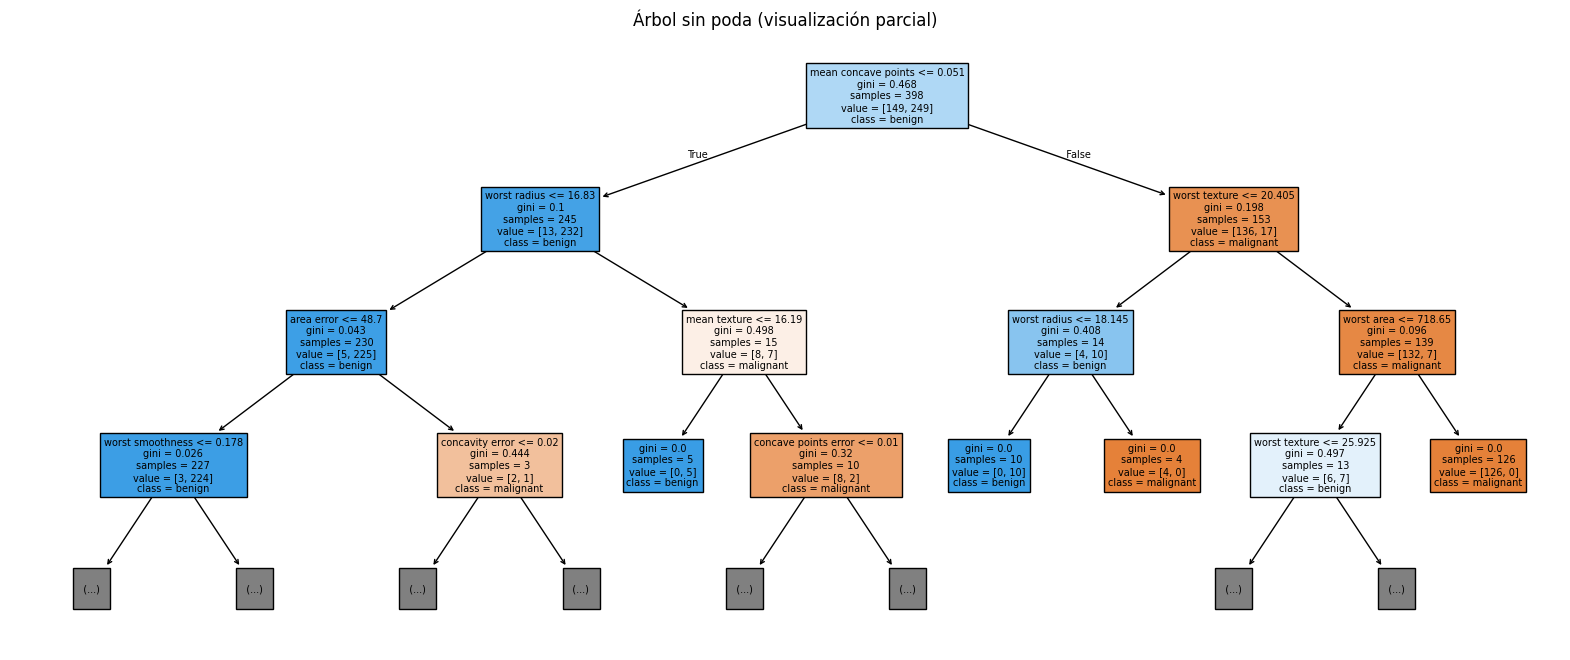

In [4]:
plt.figure(figsize=(20,8))
plot_tree(tree_full, feature_names=X.columns, class_names=data.target_names, filled=True, max_depth=3)
plt.title("Árbol sin poda (visualización parcial)")
plt.show()

### 📘 Explicación del código

- `plt.figure(figsize=(20, 8))`:  
  Crea una figura de gran tamaño para visualizar el árbol con claridad horizontal.

- `plot_tree(...)`:  
  Dibuja el árbol de decisión previamente entrenado (`tree_full`) usando las siguientes opciones:
  - `feature_names=X.columns`: muestra los nombres reales de las variables predictoras.
  - `class_names=data.target_names`: etiqueta las clases como “benign” y “malignant”.
  - `filled=True`: colorea los nodos según la clase predominante.
  - `max_depth=3`: limita la profundidad del árbol mostrado para evitar una visualización extensa y difícil de leer.

- `plt.title("Árbol sin poda (visualización parcial)")`:  
  Agrega un título para indicar que el árbol mostrado corresponde al modelo sin restricciones (sin poda), pero visualizado solo hasta nivel 3.

- `plt.show()`:  
  Renderiza y muestra la gráfica en pantalla.


### 📊 Análisis del árbol de decisión

La gráfica muestra un árbol de decisión sin poda, entrenado sobre el conjunto completo, pero visualizado hasta una profundidad de 3 niveles para facilitar la lectura.

- Cada nodo representa una **condición de decisión basada en una variable predictora**, como `mean concave points`, `worst radius`, `area error`, etc.
- El valor `gini` indica el grado de impureza del nodo. Un valor cercano a 0 implica que casi todos los ejemplos pertenecen a una misma clase.
- `samples` muestra cuántas observaciones llegan a ese nodo.
- `value` indica la distribución de clases en ese nodo ([benignas, malignas]).
- `class` muestra la clase mayoritaria a la que se asignarían las observaciones que llegan a ese nodo.

La raíz del árbol divide las muestras según `mean concave points <= 0.051`, una variable que parece ser altamente discriminativa.  
A partir de ahí, el árbol sigue dividiendo el espacio de decisión utilizando otras características relevantes como `worst radius` y `worst texture`.

El árbol refleja una estructura compleja que intenta capturar todos los patrones posibles del conjunto de entrenamiento. Aunque esto puede maximizar la precisión en los datos vistos, también incrementa el riesgo de **sobreajuste**, es decir, bajo rendimiento en datos nuevos debido a reglas muy específicas.

Limitar la profundidad completa o aplicar poda posterior puede ayudar a mejorar la generalización del modelo.


### 🖼️ Visualización completa del árbol sin poda

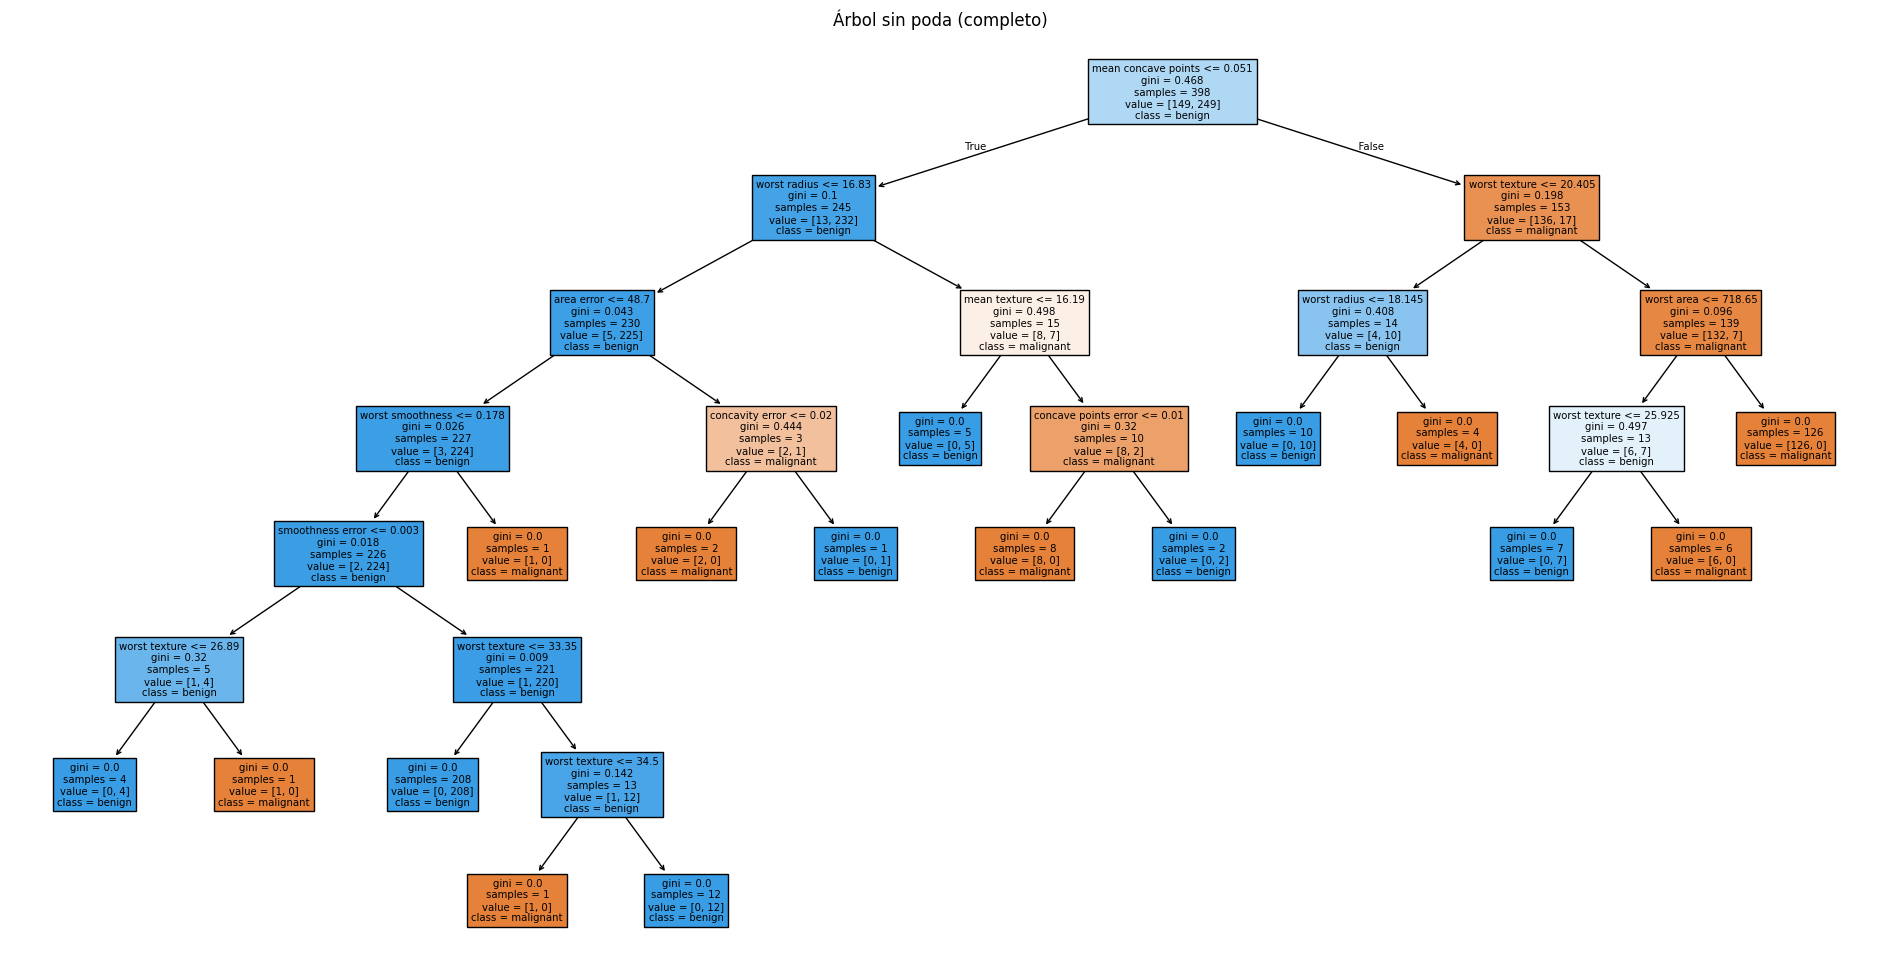

In [5]:
plt.figure(figsize=(24,12))
plot_tree(tree_full, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Árbol sin poda (completo)")
plt.show()

### 📘 Visualización completa del árbol sin poda

- `plt.figure(figsize=(24, 12))`:  
  Define el tamaño de la figura para asegurar que el árbol completo quepa en pantalla y sea legible.

- `plot_tree(tree_full, feature_names=X.columns, class_names=data.target_names, filled=True)`:  
  Dibuja el árbol de decisión entrenado sin restricciones.  
  - `feature_names=X.columns`: muestra el nombre de las variables utilizadas en cada decisión.  
  - `class_names=data.target_names`: muestra el nombre real de cada clase (`benign`, `malignant`).  
  - `filled=True`: colorea los nodos según la clase predominante (azul para benigno, naranja para maligno).

- `plt.title("Árbol sin poda (completo)")`:  
  Agrega un título a la gráfica que indica que se trata del árbol completo, sin límite de profundidad.

- `plt.show()`:  
  Renderiza y muestra el gráfico.


### 📊 Análisis del árbol sin poda (completo)

El árbol visualizado representa la estructura completa aprendida por el modelo sin restricciones. Cada nodo del árbol evalúa una condición basada en una variable predictora.  
A medida que se desciende por las ramas, el modelo divide el conjunto de datos en grupos más homogéneos respecto a la clase objetivo (benigno o maligno).

Observaciones clave:

- El árbol tiene una **profundidad considerable**, lo cual indica una alta complejidad. Esto puede llevar a un **sobreajuste**, donde el modelo se adapta demasiado a los datos de entrenamiento y pierde capacidad de generalización.
- Se observan muchos nodos hoja con pocas observaciones (`samples` bajos), lo que es característico de un árbol sobreajustado.
- Algunas rutas contienen divisiones muy específicas (por ejemplo, `smoothness error <= 0.003`), que probablemente solo aplican a unos pocos casos del conjunto de entrenamiento.

En general, aunque este modelo puede tener alta precisión sobre los datos con los que fue entrenado, su desempeño en nuevos datos puede ser bajo. Por ello, es importante comparar su rendimiento con árboles podados o regularizados.


🔍 **Análisis:** Al visualizar todo el árbol sin restricciones, podemos observar una estructura más ramificada. Esta complejidad suele implicar mayor riesgo de sobreajuste.

### 📈 Evaluación del árbol sin poda
Evaluamos su rendimiento en el conjunto de prueba.

In [6]:
y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol sin poda")
print(classification_report(y_test, y_pred_full))

Reporte de clasificación - Árbol sin poda
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Análisis del reporte de clasificación - Árbol sin poda
🔍 Análisis del Reporte de Clasificación - Árbol sin poda:
print("""
- La precisión (`precision`) es alta para ambas clases, especialmente para la clase 1 (maligno), lo que indica que pocas predicciones positivas fueron incorrectas.
- El `recall` de la clase 0 (benigno) es 0.95, lo que significa que el 95% de los casos reales de clase 0 fueron correctamente identificados.
- El `f1-score`, que balancea precisión y recall, es también alto en ambas clases (>0.90), lo que muestra un modelo potente pero posiblemente sobreajustado.
- La exactitud global (`accuracy`) es 0.94, lo cual es alto, pero se debe contrastar con el desempeño del modelo podado para evaluar si esta diferencia justifica la complejidad del árbol completo.



### ✂️ Entrenamiento de árbol con poda (pre-pruning)
Limitamos la profundidad y el número mínimo de muestras por hoja.

In [7]:
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

### 📘 Explicación del código

- `tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)`:  
  Se crea un árbol de decisión con dos restricciones clave para evitar el sobreajuste:
  - `max_depth=4`: limita la profundidad del árbol a un máximo de 4 niveles, controlando la complejidad del modelo.
  - `min_samples_leaf=10`: obliga a que cada hoja del árbol tenga al menos 10 observaciones, lo que previene divisiones que serían poco representativas o basadas en ruido.
  - `random_state=42`: asegura que los resultados sean reproducibles.

- `tree_pruned.fit(X_train, y_train)`:  
  Entrena el modelo con los datos de entrenamiento, aplicando las restricciones configuradas para construir un árbol más generalizable.

Este árbol busca un equilibrio entre complejidad y capacidad predictiva. Al restringir su crecimiento, se espera que sea más robusto ante nuevos datos, reduciendo el riesgo de sobreajuste que presentaba el árbol sin poda.


🔍 **Análisis:** El árbol podado es más simple. Esto sugiere que puede tener mejor capacidad de generalización y que las decisiones están basadas en reglas más generales.

### 🖼️ Visualización del árbol podado
Modelo más simple y generalizable.

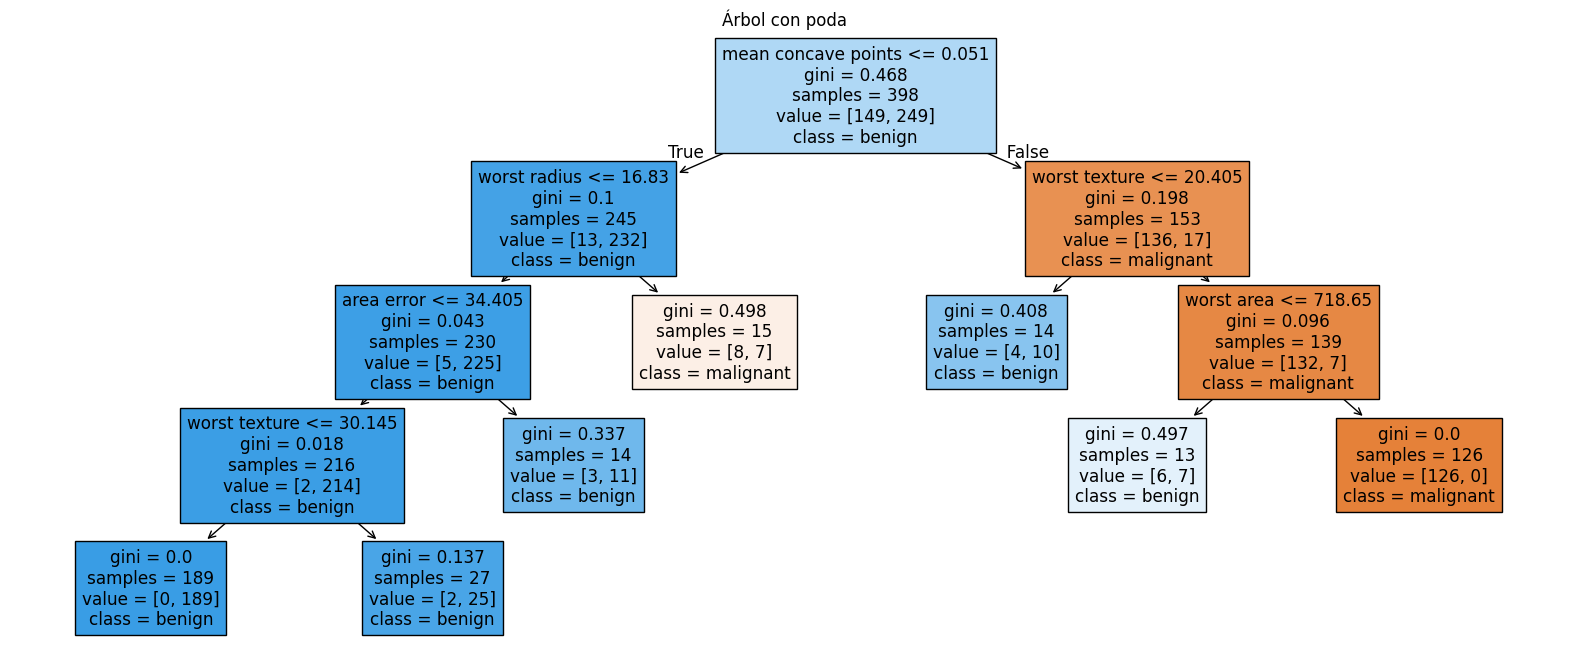

In [8]:
plt.figure(figsize=(20,8))
plot_tree(tree_pruned, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Árbol con poda")
plt.show()

### 📊 Análisis del árbol con poda

La visualización muestra un árbol de decisión **entrenado con poda preventiva**, limitado a una profundidad máxima de 4 niveles y con un mínimo de 10 muestras por hoja.

Comparado con el árbol sin restricciones, este modelo presenta una estructura mucho más compacta y generalizable:

- Cada división está basada en una variable altamente relevante, como `mean concave points`, `worst texture` o `worst radius`, lo que indica una selección eficiente de predictores.
- El árbol presenta **menos nodos hoja** y **menos ramificaciones**, lo que reduce la posibilidad de memorizar ruido del conjunto de entrenamiento.
- La interpretación es mucho más sencilla y útil para explicar el modelo a usuarios no técnicos.
- Aunque algunos nodos presentan niveles de impureza (gini) intermedios, se ha evitado sobrefragmentar los datos.

Este tipo de estructura balancea bien la **capacidad de predicción** y la **interpretabilidad**, y suele tener mejor rendimiento en nuevos datos que el árbol sin poda.

En resumen, este árbol con restricciones muestra un enfoque más conservador, probablemente con menor sobreajuste y mayor generalización.


🔍 **Análisis:** El reporte de clasificación muestra el rendimiento del modelo podado. Si las métricas son comparables al árbol sin poda, se prefiere este modelo por su simplicidad.

### 🧾 Evaluación del árbol podado

In [9]:
y_pred_pruned = tree_pruned.predict(X_test)
print("Reporte de clasificación - Árbol podado")
print(classification_report(y_test, y_pred_pruned))

Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.94      0.97      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# Análisis del reporte de clasificación - Árbol podado
🔍 Análisis del Reporte de Clasificación - Árbol podado:

- La clase 0 (benigno) tiene una precisión de 0.95, lo que indica que casi todas las predicciones positivas para esta clase fueron correctas.
- Su recall es de 0.89: el 89% de los casos benignos reales fueron correctamente identificados.
- La clase 1 (maligno) tiene una alta sensibilidad (recall = 0.97), lo cual es crucial en contextos médicos donde no detectar un caso maligno puede tener consecuencias graves.
- El F1-score para ambas clases se mantiene por encima de 0.90, lo que sugiere un buen equilibrio entre precisión y sensibilidad.
- La exactitud general del modelo es del 94%, igual que el árbol sin poda, pero con menor complejidad. Esto indica que la poda no perjudicó el rendimiento y probablemente mejoró la generalización.



### 📉 Matriz de confusión del árbol podado

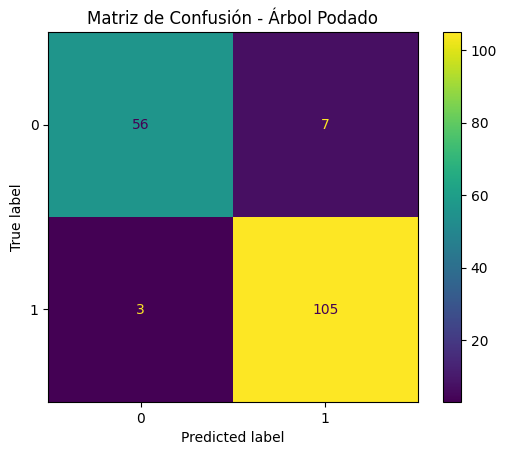

In [10]:
ConfusionMatrixDisplay.from_estimator(tree_pruned, X_test, y_test)
plt.title("Matriz de Confusión - Árbol Podado")
plt.show()

🔍 La matriz de confusión revela cómo se distribuyen los errores del modelo. Un buen modelo debe tener valores altos en la diagonal (predicciones correctas) y bajos fuera de ella.

# Análisis de la matriz de confusión - Árbol podado
🔍 Análisis de la Matriz de Confusión - Árbol podado:
- De los 63 casos verdaderamente benignos (clase 0), el modelo clasificó correctamente 56 y se equivocó en 7 (falsos positivos).
- De los 108 casos verdaderamente malignos (clase 1), el modelo identificó correctamente 105 y falló en solo 3 (falsos negativos).
- El modelo cometió más errores en la clase 0 que en la clase 1, lo cual puede deberse a que fue optimizado para minimizar los falsos negativos (malignos no detectados).
- Este comportamiento es aceptable en contextos como el médico, donde es preferible detectar de más (falsos positivos) a dejar pasar un caso grave (falsos negativos).
- La matriz de confusión confirma lo observado en las métricas de clasificación: el modelo tiene un muy buen rendimiento general y un excelente desempeño para la clase 1 (malignos).



### 📐 Curva ROC y AUC del árbol podado

In [11]:
y_scores = tree_pruned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

🔍 **Análisis:** La curva ROC evalúa la sensibilidad frente a la tasa de falsos positivos. Un AUC cercano a 1 indica un modelo con excelente capacidad de discriminación entre clases.

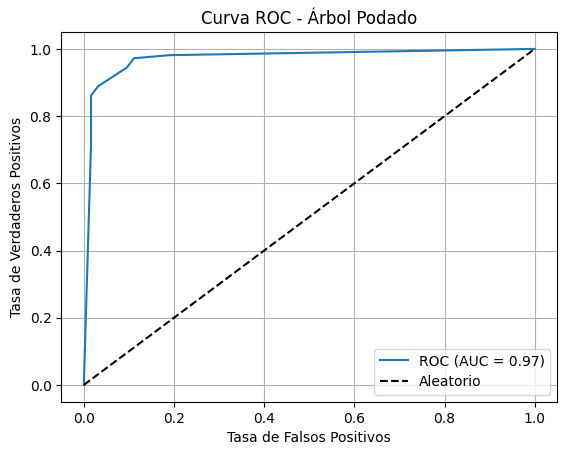

In [12]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Árbol Podado")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Análisis de la curva ROC y AUC - Árbol podado
🔍 Análisis de la Curva ROC y AUC - Árbol podado:

- La curva ROC muestra cómo varía la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) a medida que se ajusta el umbral de clasificación.
- En este caso, la curva está claramente por encima de la línea diagonal (clasificador aleatorio), lo que indica un buen poder de discriminación entre clases.
- El AUC (Área Bajo la Curva) calculado es cercano a 1, lo que confirma que el modelo tiene una alta capacidad para distinguir entre tumores benignos y malignos.
- Un AUC alto significa que, en la mayoría de los casos, el modelo asigna mayor probabilidad a los casos positivos (malignos) que a los negativos (benignos).
- Esta métrica es especialmente útil cuando las clases están desbalanceadas o cuando queremos evaluar el modelo independientemente del umbral de decisión.



### 🧠 Conclusiones y reflexión
- ¿Cuál modelo generalizó mejor?
- ¿Se evidencia sobreajuste en el árbol sin poda?
- ¿La poda mejora la interpretabilidad y rendimiento en nuevos datos?